In [7]:
import pymongo
from pymongo import UpdateOne, UpdateMany
import time
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.pool import ThreadPool as pool

p = pool(3)



def write_bulk(obj):
    obj[0].bulk_write([UpdateMany({'channel' : f'{t}'}, {'$set': {f'{t}': obj[1][t][f'{t}'] + obj[2][:,t].tolist()}}) for t in range(48)])


#Must call this every time after a close event
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
try:
    peak = mydb.create_collection("adc_peak")
    area = mydb.create_collection("adc_area")
    width = mydb.create_collection("adc_width")
    cttot = mydb.create_collection("photon_total")
except:
    pass

adc_peak_base = np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0] for z in range(2)])
adc_area_base = np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818] for z in range(2)])
adc_width_base = np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4] for z in range(2)])
count_total_base = np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0] for z in range(2)]) 
peak_cursor = peak.find()
area_cursor = area.find()
width_cursor = width.find()
count_cursor = cttot.find()
manytimeset = []

# try:
for ct in range(2,70000,100):
# for ct in range(2,5):
    #Setup the array to be the size we want 2 - 70000
    adc_peak = np.array([[47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0] for t in range(ct)])
    adc_area = np.array([[1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818] for t in range(ct)])
    adc_width = np.array([[84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4] for t in range(ct)])
    count_total = np.array([[2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0] for t in range(ct)]) 

    #Put the intial array into the database, we are wiping each collection every loop so this will not be taken into account with the stats
    _ = mydb.adc_peak.insert_many({'channel' : f'{p}', f'{p}' : adc_peak_base[:,p].tolist()} for p in range(48))
    _ = mydb.adc_area.insert_many({'channel' : f'{p}', f'{p}' : adc_area_base[:,p].tolist()} for p in range(48))
    _ = mydb.adc_width.insert_many({'channel' : f'{p}', f'{p}' : adc_width_base[:,p].tolist()} for p in range(48))
    _ = mydb.photon_total.insert_many({'channel' : f'{p}', f'{p}' : count_total_base[:,p].tolist()} for p in range(48))

    #NOTE: There is no way to get away from doing it like this because we need to update the individual document not 
    start = time.time()
    p.map(write_bulk, [[peak, peak_cursor, adc_peak],[area, area_cursor, adc_area],[width, width_cursor, adc_width],[cttot, count_cursor, count_total],])
    # peak.bulk_write([UpdateMany({'channel' : f'peak {t}'}, {'$set': {f'{t}': peak_cursor[t][f'{t}'] + adc_peak[:,t].tolist()}}) for t in range(48)])
    # area.bulk_write([UpdateMany({'channel' : f'area {t}'}, {'$set': {f'{t}': area_cursor[t][f'{t}'] + adc_area[:,t].tolist()}}) for t in range(48)])
    # width.bulk_write([UpdateMany({'channel' : f'width {t}'}, {'$set': {f'{t}': width_cursor[t][f'{t}'] + adc_width[:,t].tolist()}}) for t in range(48)])
    # cttot.bulk_write([UpdateMany({'channel' : f'count {t}'}, {'$set': {f'{t}': count_cursor[t][f'{t}'] + count_total[:,t].tolist()}}) for t in range(48)])#this works
    end = time.time()
    manytimeset.append(end-start)

    peak.delete_many({})
    area.delete_many({})
    width.delete_many({})
    cttot.delete_many({})


mydb.drop_collection(peak)
mydb.drop_collection(area)
mydb.drop_collection(width)
mydb.drop_collection(cttot)
myclient.close()
timexmany = [l for l in range(2,70000,100)]

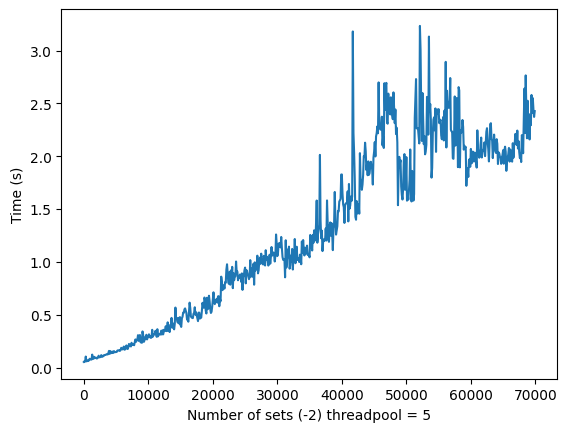

In [4]:
import matplotlib.pyplot as plt
plt.plot(timexmany, manytimeset)
# plt.ylim(0,10)
plt.xlabel('Number of sets (-2) threadpool = 5')
plt.ylabel('Time (s)')
plt.show()

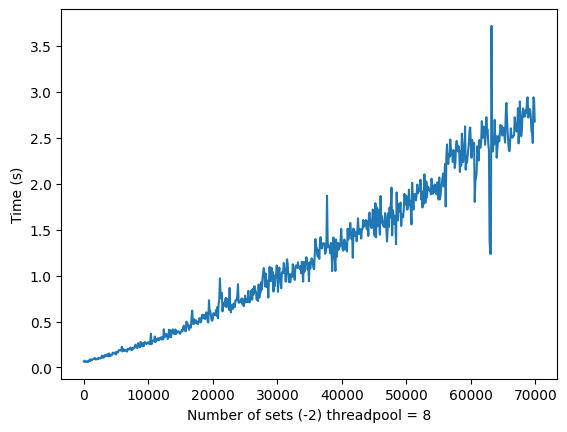

In [6]:
import matplotlib.pyplot as plt
plt.plot(timexmany, manytimeset)
# plt.ylim(0,10)
plt.xlabel('Number of sets (-2) threadpool = 8')
plt.ylabel('Time (s)')
plt.show()

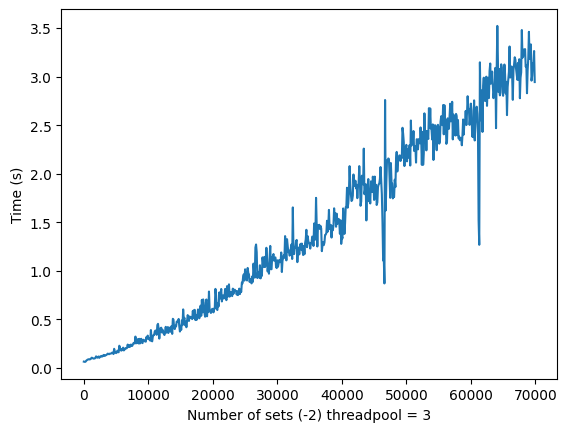

In [8]:
import matplotlib.pyplot as plt
plt.plot(timexmany, manytimeset)
# plt.ylim(0,10)
plt.xlabel('Number of sets (-2) threadpool = 3')
plt.ylabel('Time (s)')
plt.show()

Going to give quest DB a try now

In [1]:
import numpy as np
peak_base = [47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0, 47103.0, 33995.0, 35008.0, 36028.0, 35592.0, 34896.0, 50403.0, 36451.0, 33803.0, 34923.0, 34888.0, 34913.0]
area_base = [1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818, 1.2949853832322904, 1.7600154426395034, 1.4558833434363845, 1.4272641537237334, 1.616168024003429, 1.773990085278409, 1.115419803392102, 1.0411269060841692, 1.2650121808810502, 1.4290298944300492, 1.6004416530442513, 1.750695021638818]
width_base = [84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4, 84, 4, 7, 8, 5, 4, 28, 193, 12, 7, 5, 4]
count_base = [2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2739, 9, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from questdb.ingress import Sender, TimestampNanos, Buffer, TimestampMicros
import pandas as pd
import numpy as np
import time
import requests
from multiprocessing.pool import ThreadPool as pool
import concurrent.futures


# def buf_extend():


# p = pool(5)
peak_vals = {}
area_vals = {}
width_vals = {}
count_vals = {}
# NOTE: We can hardcode this because if nothing is there then we put zeros in the real world
for t in range(48):
    peak_vals[f'PEAK {t}'] = peak_base[t]
    area_vals[f'AREA {t}'] = area_base[t]
    width_vals[f'WIDTH {t}'] = width_base[t]
    count_vals[f'COUNT {t}'] = count_base[t]

dict1 = {}
dict1.update(peak_vals)
dict1.update(area_vals)
dict1.update(width_vals)
dict1.update(count_vals)
# print(dict1)
buf = Buffer()

df1 = pd.DataFrame.from_dict(peak_vals, orient='index')
df2 = pd.DataFrame.from_dict(area_vals, orient='index')
df3 = pd.DataFrame.from_dict(width_vals, orient='index')
df4 = pd.DataFrame.from_dict(count_vals, orient='index')
df = pd.concat([df1,df2,df3,df4], axis=0)

#NOTE: Would like to change this to also allow the flush size to happen more frequently
conf = f'http::addr=localhost:9000;max_buf_size=500000000;auto_flush=on;auto_flush_rows=10000;' 
# conf = f'http::addr=localhost:9000;max_buf_size=500000000;auto_flush=on;'     
attime = TimestampNanos.now()    

timedelay = []
timelongdelay = []
with Sender.from_conf(conf) as sender:
    # buf.dataframe(df.T, table_name='daq', at=TimestampNanos.now())
    # sender.flush(buf)

    # for i in range(1, 502, 100):
    for i in range(0, 71000, 1000):
        print(f"step: {i}")
        #NOTE: removing the setup of the table because this seems to take 2 seconds + and only exist on the first setup
        # sender.row(
        #     'sensors',
        #     columns=dict1,
        #     at=TimestampNanos.now())
        # buf.dataframe(df.T, table_name='sensors', at=TimestampNanos.now())
        # sender.flush(buf)
        sender.row('sensors', columns=dict1, at=attime)
        # sender.dataframe(df.T, table_name='sensors', at=TimestampNanos.now())
        # sender.dataframe(df.T, table_name='sensors', at=attime)
        # print(f"time for first dataframe: {start - time.perf_counter()}")
        sender.flush()
        # print(f"time for first dataframe and flush: {start - time.perf_counter()}")
        # x = input("hold two")
        
        startlong = time.perf_counter()
        # timestart = TimestampNanos.now()
        # info = df.T
        # for c in range(i):
        #     info = pd.concat([info, df.T], axis=0)
        # info = [df.T for c in range(i)] #Make the dataframe here
        # data = [peak_base for c in range(i)]
        # print(info)
        for c in range(i):
            with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
                executor.submit(sender.row(
                'sensors',
                columns = dict1,
                at=attime
                ))
                # print('Hi')
                # executor.submit(sender.dataframe(df.T, table_name='sensors', at=TimestampNanos.now()))
                # executor.submit(sender.dataframe(df.T, table_name='sensors', at=attime))
        # for c in range(i):
            # p.add_task()
            # sender.row(
            # 'sensors',
            # columns = dict1,
            # at=TimestampNanos.now()
            # )
            # buf.dataframe(df.T, table_name='sensors', at=TimestampNanos.now())
            # sender.dataframe(df.T, table_name='sensors', at=TimestampNanos.now())
        start = time.perf_counter()
        # sender.dataframe(info, table_name='sensors', at=TimestampNanos.now())
        # print(f"time to append data frames: {time.perf_counter() - startlong}")
        # sender.flush(buf)
        sender.flush()
        end = time.perf_counter()
        timedelay.append(end - start)
        timelongdelay.append(end-startlong)
        # x = input("hold one")
        resp = requests.get('http://localhost:9000/exp',
                            {
                                'query' : 'DROP TABLE sensors'
                            })

timexdelay = [l for l in range(0,71000,1000)]


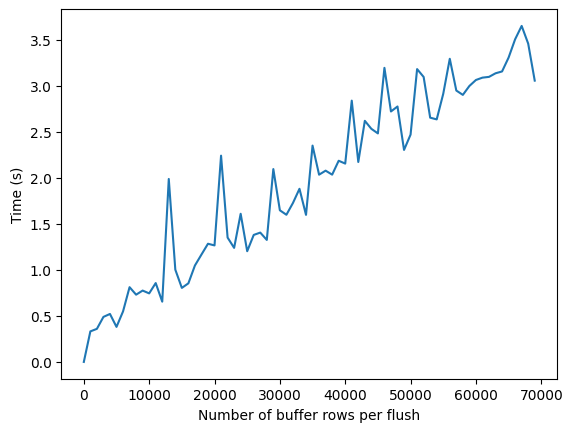

In [21]:
import matplotlib.pyplot as plt
plt.plot(timexdelay, timedelay)
# plt.ylim(0,10)
plt.xlabel('Number of buffer rows per flush')
plt.ylabel('Time (s)')
plt.show()

This sets up the data base and the next two blocks create 70k rows and then `c.execute()` commits the query

In [7]:
import psycopg # works well
import numpy as np
import time

channels_expr = ""

num_channels = 12
feature_name = "PEAKHEIGHT" # for example

for ch in np.arange(num_channels):
    channels_expr+=f"CH{ch} INTEGER, "

create_peakheight_table = \
f"CREATE TABLE {feature_name} (EVENT_ID INTEGER, TIME BIGINT, {channels_expr[:-2]})"

db_params = {
"host": "127.0.0.1",
"dbname": "postgres",
"user": "postgres",
"password": "password",
"port": "5432"
}

db_conn = psycopg.connect(**db_params)
c = db_conn.cursor()
db_conn.autocommit = True
req_start = time.monotonic()
c.execute(create_peakheight_table)
req_stop = time.monotonic()

print((req_stop - req_start))
print(c.statusmessage)

0.031000000002677552
CREATE TABLE


In [8]:
query_string = "INSERT into PEAKHEIGHT(event_id, time, ch0, ch1, ch2, ch3, ch4, ch5, ch6, ch7, ch8, ch9, ch10, ch11) VALUES"

def current_milli_time():
    return round(time.time() * 1000)

def single_row_string(id, ts, ch0, ch1, ch2, ch3, ch4, ch5, ch6, ch7, ch8, ch9, ch10, ch11):
    return f" ({id}, {ts}, {ch0}, {ch1}, {ch2}, {ch3}, {ch4}, {ch5}, {ch6}, {ch7}, {ch8}, {ch9}, {ch10}, {ch11}),"

def make_row_string(id, ts, channel_values):
    query_string = "%s, %s" % (str(id), str(ts))
    for chv in channel_values:
        query_string += f", {str(chv)}"

    return f" ({query_string}),"

def make_composite_row_string(query_string_base, rows):
    new_query_string = query_string_base
    for row_args in rows:
        new_query_string += make_row_string(row_args[0], row_args[1], row_args[2:])

    return new_query_string[:-1] + " RETURNING event_id;"

rows = []
for id in np.arange(start=10000,stop=80000):
    row = [id, current_milli_time()]
    row.extend([i for i in np.random.randint(low=0, high=32767, size=12)])
    rows.append(row)

test_string = make_composite_row_string(query_string, rows)

In [14]:
c.execute(test_string)

<psycopg.Cursor [TUPLES_OK] [IDLE] (host=127.0.0.1 database=postgres) at 0x26abbe32a50>

In [32]:
t = c.execute("SELECT ch0 FROM peakheight")
print(t)

<psycopg.Cursor [TUPLES_OK] [IDLE] (host=127.0.0.1 database=postgres) at 0x26abbe32a50>


In [34]:
for  in t:
    print(f"x: {x}, {type(x)}, {y}")
print(f"t: {type(t)}")

ValueError: not enough values to unpack (expected 2, got 1)

In [74]:
c.execute(f"SELECT ARRAY_AGG(ch0) FROM peakheight", binary=True)
start = time.perf_counter()
arr1 = c.fetchone()
print(time.perf_counter() - start)
print(arr1)

0.0018041000002995133
([6378, 20292, 30595, 25723, 19850, 2160, 5169, 10339, 15308, 8619, 25129, 53, 10007, 10858, 25429, 8872, 5177, 11616, 13779, 30074, 16733, 32127, 12733, 6160, 13877, 15661, 17831, 14294, 5028, 25198, 21725, 29654, 21935, 20831, 14911, 32000, 32380, 5286, 20311, 28150, 20559, 14885, 17967, 22341, 10900, 14259, 11020, 23641, 10902, 17755, 27450, 28863, 10505, 14838, 7525, 22264, 18117, 25998, 6600, 16665, 20497, 5398, 27574, 28926, 3872, 3304, 204, 4869, 30679, 2931, 3417, 26825, 21218, 17008, 24891, 17250, 16868, 25133, 29070, 11996, 9980, 15909, 23163, 23011, 12050, 27929, 14345, 2717, 23168, 8806, 6779, 31192, 13520, 17466, 15013, 15730, 15383, 19563, 4826, 12839, 21738, 18361, 17433, 21319, 2049, 6849, 15867, 31275, 11976, 13077, 15677, 1409, 29872, 23813, 31003, 14627, 19667, 31409, 7943, 12209, 12050, 23194, 22124, 30927, 20555, 19599, 2466, 10462, 23503, 29354, 31138, 30372, 18925, 9708, 21974, 24595, 29845, 14362, 26552, 23859, 29616, 23386, 31223, 17445, 1

In [66]:
# print(len(arr))
arr = c.execute("SELECT ARRAY_AGG(ch0) FROM peakheight", binary=True)
start = time.perf_counter()
for x in arr:
    z = x
print(time.perf_counter() - start)


0.002436800001305528


In [1]:
# print(len(arr[0][0]))
arr = [1,1,1,1]
if not arr:
    print("hehe")
if arr:
    print("yay")
arr.append(1)
if not arr:
    print("hehe")
arr.append(1)
if arr is None:
    print("hehe")

yay


: 

In [3]:
from multiprocessing.pool import ThreadPool as pool
import numpy as np
import cupy as cp


def output(input):
    print(f"input: {input}")



arr = np.asarray([
    [1,2,3,4,5,6,7,8,9],
    [2,3,4,5,6,7,8,9,1],
    [3,4,5,6,7,8,9,1,2],
    [4,5,6,7,8,9,1,2,3],
    [5,6,7,8,9,1,2,3,4],
    [5,6,7,8,9,1,2,3,4],
    [1,2,3,4,5,6,7,8,9],
    [2,3,4,5,6,7,8,9,1],
    [3,4,5,6,7,8,9,1,2],
    [4,5,6,7,8,9,1,2,3],
    [5,6,7,8,9,1,2,3,4],
    [5,6,7,8,9,1,2,3,4],
    [1,2,3,4,5,6,7,8,9],
    [2,3,4,5,6,7,8,9,1],
    [3,4,5,6,7,8,9,1,2],
    [4,5,6,7,8,9,1,2,3],
    [5,6,7,8,9,1,2,3,4],
    [5,6,7,8,9,1,2,3,4]
    ])

# print(arr.T)

testd = {}
testd['arr'] = []
testd['count'] = []
# arr = [
#     [1,2,3,4,5,6,7,8,9],
#     [2,3,4,5,6,7,8,9,1],
#     [3,4,5,6,7,8,9,1,2],
#     [4,5,6,7,8,9,1,2,3],
#     [5,6,7,8,9,1,2,3,4],
#     [5,6,7,8,9,1,2,3,4]
# ]

change = cp.array(arr.T)
print(change)

new = cp.asnumpy(change)
print(new)

testd['arr'].extend(arr)
print(testd)

testd['count'].extend(arr)
print(testd)

testd['arr'].extend(arr)
print(testd)

# testd['arr'] = arr.T

# p = pool(3)

# p.map(output, testd['arr'])

[[1 2 3 4 5 5 1 2 3 4 5 5 1 2 3 4 5 5]
 [2 3 4 5 6 6 2 3 4 5 6 6 2 3 4 5 6 6]
 [3 4 5 6 7 7 3 4 5 6 7 7 3 4 5 6 7 7]
 [4 5 6 7 8 8 4 5 6 7 8 8 4 5 6 7 8 8]
 [5 6 7 8 9 9 5 6 7 8 9 9 5 6 7 8 9 9]
 [6 7 8 9 1 1 6 7 8 9 1 1 6 7 8 9 1 1]
 [7 8 9 1 2 2 7 8 9 1 2 2 7 8 9 1 2 2]
 [8 9 1 2 3 3 8 9 1 2 3 3 8 9 1 2 3 3]
 [9 1 2 3 4 4 9 1 2 3 4 4 9 1 2 3 4 4]]
[[1 2 3 4 5 5 1 2 3 4 5 5 1 2 3 4 5 5]
 [2 3 4 5 6 6 2 3 4 5 6 6 2 3 4 5 6 6]
 [3 4 5 6 7 7 3 4 5 6 7 7 3 4 5 6 7 7]
 [4 5 6 7 8 8 4 5 6 7 8 8 4 5 6 7 8 8]
 [5 6 7 8 9 9 5 6 7 8 9 9 5 6 7 8 9 9]
 [6 7 8 9 1 1 6 7 8 9 1 1 6 7 8 9 1 1]
 [7 8 9 1 2 2 7 8 9 1 2 2 7 8 9 1 2 2]
 [8 9 1 2 3 3 8 9 1 2 3 3 8 9 1 2 3 3]
 [9 1 2 3 4 4 9 1 2 3 4 4 9 1 2 3 4 4]]
{'arr': [array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2, 3, 4, 5, 6, 7, 8, 9, 1]), array([3, 4, 5, 6, 7, 8, 9, 1, 2]), array([4, 5, 6, 7, 8, 9, 1, 2, 3]), array([5, 6, 7, 8, 9, 1, 2, 3, 4]), array([5, 6, 7, 8, 9, 1, 2, 3, 4]), array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2, 3, 4, 5, 6, 7, 8, 9, 1]),

In [43]:
import numpy as np
arr = []
extra = np.array([1,2,3,4,5,6])
arr.append(extra)
arr.append(extra)
print(arr)
print(np.array(arr, ndmin=2).T)
print(np.array(extra, ndmin=2).T)
print(np.column_stack(arr))
print(extra.ndim)
print(np.asarray(arr).ndim)
# print(len(arr))
# print(len(arr[0]))
# data = np.reshape(arr, (len(arr[0])), 0)

[array([1, 2, 3, 4, 5, 6]), array([1, 2, 3, 4, 5, 6])]
[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]]
1
2


: 

In [12]:
from rocksdict import Rdict
import numpy as np
import pandas as pd

path = str("./test_dict")

# create a Rdict with default options at `path`
db = Rdict(path)
db[1.0] = 1
db["huge integer"] = 2343546543243564534233536434567543
db["good"] = True
db["bytes"] = b"bytes"
db["this is a list"] = [1, 2, 3]
db["store a dict"] = {0: 1}
db[b"numpy"] = np.array([1, 2, 3])
db["a table"] = pd.DataFrame({"a": [1, 2], "b": [2, 1]})

# reopen Rdict from disk
db.close()
db = Rdict(path)
assert db[1.0] == 1
assert db["huge integer"] == 2343546543243564534233536434567543
assert db["good"] == True
assert db["bytes"] == b"bytes"
assert db["this is a list"] == [1, 2, 3]
assert db["store a dict"] == {0: 1}
assert np.all(db[b"numpy"] == np.array([1, 2, 3]))
assert np.all(db["a table"] == pd.DataFrame({"a": [1, 2], "b": [2, 1]}))

# iterate through all elements
for k, v in db.items():
    print(f"{k} -> {v}")

# batch get:
print(db[["good", "bad", 1.0]])
# [True, False, 1]

# delete Rdict from dict
db.close()
Rdict.destroy(path)


b'numpy' -> [1 2 3]
a table ->    a  b
0  1  2
1  2  1
bytes -> b'bytes'
good -> True
huge integer -> 2343546543243564534233536434567543
store a dict -> {0: 1}
this is a list -> [1, 2, 3]
1.0 -> 1
[True, None, 1]


In [52]:
import time
starttime = time.perf_counter()
tot = sum(arr1)
print(f"time elapsed: {time.perf_counter()-starttime}\nTotal: {tot}")

time elapsed: 0.00012779998360201716
Total: 38056958


In [8]:
# import time
# print(time.time())
output = {}
output["data"] = [1]
output["new"] = [1,2]

if output["data"] and output["new"]:
    print("yay")
else:
    print("no")
# time.sleep(1)

# print(time.time())

1721324125.956529
yay
1721324126.9577155


In [ ]:
self.visualUpdate.emit(args[0]['count_data'])
p.map(process, args[0]["adc_data"])

https://pytorch.org/get-started/locally/

In [ ]:
import torch

t1 = torch.tensor(arr1)

In [20]:
# import time
# print(time.gmtime().tm_year)

import os
PATH = os.path.realpath("../ZMQTesting/explanation.txt")
print(PATH)

f = open("../ZMQTesting/explanation.txt")
print(f)
f.close()


C:\Users\MichaelKolb\Github\ZMQTesting\explanation.txt
<_io.TextIOWrapper name='../ZMQTesting/explanation.txt' mode='r' encoding='cp1252'>
hi


In [22]:
test = "continue"

timestart = time.perf_counter()
adc_max_index = np.where(arr3 == max(arr3))[0].item(0)
adc_peak = arr3[adc_max_index]
adc_min = min(arr3)
start,end = 0,0
half_max = int((adc_peak + adc_min) / 2)

half_max_index = np.where(arr3 == half_max)[0]
start = 0
# for end in half_max_index:
for end in half_max_index:
    if end > adc_max_index:
        break
    start = end

adc_width = (end - start)
adc_area = sum(arr3[start:end]/(adc_min * adc_width))
print(f"Time elapsed: {time.perf_counter() - timestart}")
print(f"Max index: {adc_max_index}\nADC Peak: {adc_peak}\nADC Min: {adc_min}\nArea: {area}\
    \nHalf Max: {half_max}\nStart: {start}\nEnd: {end}\nADC Width: {adc_width}\nADC Area: {adc_area}\
    \nHalf Max Index: {half_max_index}")

hi


In [ ]:
self.visualUpdate.emit(args[0]['count_data'])
p.map(process, args[0]["adc_data"])

https://pytorch.org/get-started/locally/

In [6]:
import torch
x = torch.tensor([0,1,2,3,4])

tensor(0)


In [22]:
import numpy as np
arr = [[1,2,3],[4,5,6],[7,8,9],[1,2,3],[4,5,6],[7,8,9]]
y = []
for i in range(0, 7, 3):
    y.append(i)
print(y)
print(np.add.reduceat(arr, [0,2,4]))
# print(np.add(arr))

[0, 3, 6]
[[ 5  7  9]
 [ 8 10 12]
 [11 13 15]]
